In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
import matplotlib.colors as pltc
import geopandas
import seaborn as sns

In [19]:
df = pd.read_csv("../data/metrics_by_event.csv")

In [61]:
pd.to_datetime(df["dry_date_start"].astype("int"), format='%j').dt.strftime('%m-%d')

ValueError: time data "0" doesn't match format "%j", at position 241. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [68]:
df[df["dry_date_start"]==0]

,event_id,peak_date,peak_value,peak_quantile,peak2zero,drying_rate,p_value,calendar_year,season,meteorologic_year,dry_date_start,dry_date_mean,dry_dur,gage
526,108.0,323.0,0.6,0.860916,43.0,-4.502418e-02,0.717448,1958.0,Winter,1957.0,0.0,2.5,6.0,12063000
1055,139.0,358.0,0.4,0.948941,8.0,1.060282e-01,0.874049,1972.0,Winter,1971.0,0.0,2.0,5.0,12091180
1672,327.0,361.0,0.4,0.922636,5.0,-2.519077e-17,0.897394,2011.0,Winter,2010.0,0.0,2.0,5.0,12102190
2120,129.0,342.0,7.2,0.995764,24.0,9.663159e-01,0.000004,1988.0,Winter,1987.0,0.0,4.0,9.0,12115700
2781,51.0,337.0,0.3,0.981858,29.0,-2.627220e-01,0.313388,1979.0,Winter,1978.0,0.0,4.0,9.0,12197040
3036,18.0,349.0,0.2,0.965142,17.0,-9.333333e-01,0.003535,2004.0,Winter,2003.0,0.0,1.0,3.0,12202310
3070,81.0,343.0,0.3,0.986027,23.0,1.476734e-01,0.419706,2011.0,Winter,2010.0,0.0,1.5,4.0,12202310
3834,5.0,364.0,0.1,0.697917,2.0,NaN,NaN,1955.0,Winter,1954.0,0.0,1.0,3.0,12461500
4929,334.0,363.0,0.7,0.547504,3.0,1.609640e-01,NaN,1974.0,Winter,1973.0,0.0,0.5,2.0,13068495
5104,1405.0,364.0,0.1,0.361012,2.0,NaN,NaN,2003.0,Winter,2002.0,0.0,0.5,2.0,13068495


In [57]:
df

,event_id,peak_date,peak_value,peak_quantile,peak2zero,drying_rate,p_value,calendar_year,season,meteorologic_year,dry_date_start,dry_date_mean,dry_dur,gage
0,3.0,67.0,0.1,0.992394,2.0,NaN,NaN,1966.0,Winter,1965.0,68.0,198.553846,325.0,10361700
1,5.0,19.0,0.4,0.998783,3.0,1.000000e+00,NaN,1969.0,Winter,1968.0,21.0,47.500000,54.0,10361700
2,6.0,75.0,0.1,0.992394,2.0,NaN,NaN,1969.0,Winter,1968.0,76.0,77.000000,3.0,10361700
3,9.0,93.0,0.2,0.995741,3.0,5.215734e-16,NaN,1969.0,Spring,1969.0,95.0,131.500000,74.0,10361700
4,10.0,169.0,0.2,0.995741,219.0,-1.196742e-02,9.253295e-01,1970.0,Winter,1969.0,22.0,184.732591,359.0,10361700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13858,6.0,225.0,0.1,0.875740,357.0,1.647774e-02,2.024797e-01,2014.0,Summer,2014.0,216.0,235.892473,186.0,480608115242901
13859,7.0,152.0,0.1,0.875740,2.0,NaN,NaN,2015.0,Spring,2015.0,153.0,247.000000,189.0,480608115242901
13860,8.0,160.0,0.1,0.875740,1096.0,2.982989e-02,8.377788e-07,2019.0,Spring,2019.0,159.0,188.946541,318.0,480608115242901
13861,9.0,146.0,0.1,0.875740,9.0,-4.000000e-01,3.739339e-01,2020.0,Spring,2020.0,154.0,167.500000,28.0,480608115242901


In [20]:
df = df[(df["dry_dur"]<365)&(df["dry_dur"]>1)].reset_index(drop=True)
len(df)

13863

In [42]:
# df.groupby("gage").count()
tt = df[df["gage"]==12116100].reset_index(drop=True)

- Look at the entire event from peak start to dry date mean
    - Or could could do another time period +/- 10 days or mean between peak-zero and zero-end
- Find the smallest difference between obs and model
    - See if that is less than the zero threshold of 10% of mean
    

In [52]:
tt.loc[25]

event_id                   59.0
peak_date                 137.0
peak_value                  0.5
peak_quantile          0.710953
peak2zero                 197.0
drying_rate            0.040058
p_value                0.035303
calendar_year            2000.0
season                     Fall
meteorologic_year        2000.0
dry_date_start            333.0
dry_date_mean        124.859375
dry_dur                   128.0
gage                   12116100
Name: 25, dtype: object

In [71]:
i = 25
modelZero = model[(model["climate_year"]==tt.meteorologic_year[i])&
      (model["DOY"]==tt.dry_date_start[i])]

In [73]:
modelZero

,Unnamed: 0,streamflow_VIC,streamflow_PRMS,streamflow_NWM2d0,time,streamflow_NWM2d1,streamflow_NWIS,gage,climate_year,flow_season,season,month,DOY
19904,19904,NaN,NaN,19.945,1999-11-29,33.820416,0.130257,12116100,2000,NaN,fall,11,333


In [92]:
modelZero["time"] - pd.Timedelta(tt.peak2zero[i], unit='d')
(modelZero.time + pd.Timedelta(tt.dry_date_mean[i], unit='d'))

19904   2000-04-01 20:37:30
Name: time, dtype: datetime64[ns]

In [95]:
# model[(model["time"]>= (modelZero.time - pd.Timedelta(tt.peak2zero[i], unit='d')))&
#       (model["DOY"]<= (modelZero.time + pd.Timedelta(tt.dry_date_mean[i], unit='d')))]

gg = model[(model["time"]>= "1999-05-16")&
      (model["time"]<= "2000-04-01")]

<Axes: xlabel='time'>

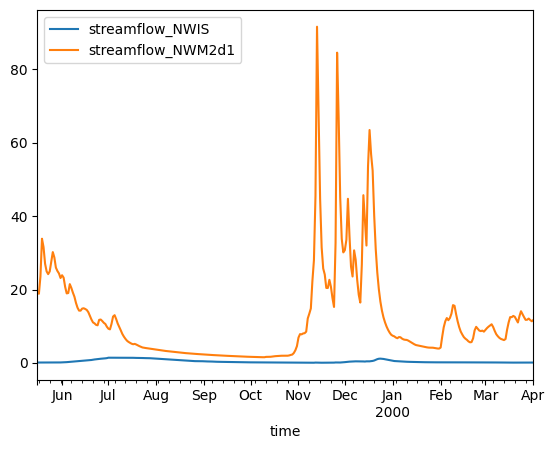

In [96]:
gg.plot(x = "time", y= ["streamflow_NWIS","streamflow_NWM2d1"])

In [26]:
def readModelFile(i):
    try:
        df = pd.read_csv('../data/pnwNP_modeledData/'+str(pnwNP['gage'][i])+".csv")
        df['time'] = pd.to_datetime(df['time'])
       
    ### Deliniate time periods
        df['climate_year'] = df.time.dt.year.where(df.time.dt.month < 4, df.time.dt.year + 1)
        df.loc[(df.time.dt.month > 7) & (df.time.dt.month < 10), "flow_season"] = "late_summer"
        df.loc[(df.time.dt.month > 2) & (df.time.dt.month < 6), "season"] = "spring"
        df.loc[(df.time.dt.month > 5) & (df.time.dt.month < 9), "season"] = "summer"
        df.loc[(df.time.dt.month > 8) & (df.time.dt.month < 12), "season"] = "fall"
        df.loc[(df.time.dt.month > 11), "season"]  = "winter"
        df.loc[(df.time.dt.month < 3), "season"] = "winter"
        df['month'] = df.time.dt.month
        df["DOY"] = df.time.dt.day_of_year
        
        # df = df.drop(['Unnamed: 0.1'],axis=1)
        df = df[df["streamflow_NWIS"].notna()].reset_index(drop=True)
        return df

    except:
        pass

In [34]:
pnwNP = pd.read_csv("../data/pnwNP_StatsLocations_HydroClass.csv")
i=55
model = readModelFile(i)
model

,Unnamed: 0,streamflow_VIC,streamflow_PRMS,streamflow_NWM2d0,time,streamflow_NWM2d1,streamflow_NWIS,gage,climate_year,flow_season,season,month,DOY
0,0,NaN,NaN,NaN,1945-06-01,NaN,1.699011,12116100,1946,NaN,summer,6,152
1,1,NaN,NaN,NaN,1945-06-02,NaN,1.755644,12116100,1946,NaN,summer,6,153
2,2,NaN,NaN,NaN,1945-06-03,NaN,1.812278,12116100,1946,NaN,summer,6,154
3,3,NaN,NaN,NaN,1945-06-04,NaN,1.812278,12116100,1946,NaN,summer,6,155
4,4,NaN,NaN,NaN,1945-06-05,NaN,1.812278,12116100,1946,NaN,summer,6,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27603,27603,NaN,NaN,NaN,2020-12-27,13.327083,0.178396,12116100,2021,NaN,winter,12,362
27604,27604,NaN,NaN,NaN,2020-12-28,11.723750,0.183493,12116100,2021,NaN,winter,12,363
27605,27605,NaN,NaN,NaN,2020-12-29,10.370000,0.189723,12116100,2021,NaN,winter,12,364
27606,27606,NaN,NaN,NaN,2020-12-30,9.345000,0.204731,12116100,2021,NaN,winter,12,365


In [5]:
def calcZeroFlow(df):
    import warnings
    warnings.filterwarnings("ignore")
    '''
    Read in data files for gages and calculate number of late-summer low flow days
    '''
    

    stat = "ZeroFlow"
    columns = ["gage","VIC_"+stat,"PRMS_"+stat,"NWM2d0_"+stat,"NWM2d1_"+stat,"NWIS_"+stat]
    out = []

    for column in df[["streamflow_VIC","streamflow_PRMS",'streamflow_NWM2d0','streamflow_NWM2d1','streamflow_NWIS']]:

        #### Round columns to add zeros
        if column == "streamflow_NWIS":
            df[column] = np.round(df[column],1)
            df.loc[df[column]==0,"new"] = 0
        else:
            df.loc[df[column]<=(df[column].mean()*.1),"new"] = 0

        ## Calculate number of zero flow days by season
        lsq10d = df[['climate_year','season','new']]
        if df["new"].isnull().all():
            lsq10d = np.nan
        else:
            lsq10d = lsq10d.groupby(['season',"climate_year"]).count()
            lsq10d = lsq10d['new'].mean()
        df = df.drop(['new'],axis=1,errors='ignore')
        out.extend([lsq10d])

    out.insert(0,int(df["gage"][0]))
    out = pd.DataFrame(out).transpose()
    out.columns = columns
    return out
